In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 50

In [4]:
data = pd.read_csv('./data/mundo-utf8.csv')
data.head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
0,Acerbaján,7400,86.0,54.0,Musulma.,75,67,98.0,1.40,35.0,3000,5,NaN,NaN,23.0,7.0,NaN,3.477121,NaN,3.285714,2.80,3.869232,100.0,100.0,3.0,5.0
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0
3,Arabia Saudí,18000,7.7,77.0,Musulma.,70,66,62.0,3.20,52.0,6651,5,2874.0,61.0,38.0,6.0,0.338889,3.822887,0.805400,6.333333,6.67,4.255273,73.0,48.0,1.0,5.0
4,Argentina,33900,12.0,86.0,Católica,75,68,95.0,1.30,25.6,3408,6,3113.0,3904.0,20.0,9.0,11.516224,3.532500,1.630279,2.222222,2.80,4.530200,96.0,95.0,8.0,6.0


In [5]:
# El dataset contiene 109 observaciones de 26 variables diferentes
np.shape(data)

(109, 26)

# Ejercicio 1

A continuación se muestra en forma de tabla:
* El número de valores distintos de missing para cada columna.
* La media y la desviación estándar de cada columna.
* Los valores mínimos y máximos para cada columna.

In [79]:
stats = pd.Series(data.shape[0] - data.isna().sum(axis=0), name = 'no_missings').to_frame()
stats['var_name'] = stats.index
stats = stats[['var_name','no_missings']]
stats.reset_index(drop = True, inplace = True)
mean_values = pd.Series(data.mean(axis = 0), name = 'mean').to_frame()
mean_values['var_name'] = mean_values.index
mean_values.reset_index(drop = True, inplace = True)
std_values = pd.Series(data.std(axis = 0), name = 'std').to_frame()
std_values['var_name'] = std_values.index
std_values.reset_index(drop = True, inplace = True)
min_values = pd.Series(data.min(axis = 0), name = 'min').to_frame()
min_values['var_name'] = min_values.index
min_values.reset_index(drop = True, inplace = True)
max_values = pd.Series(data.max(axis = 0), name = 'max').to_frame()
max_values['var_name'] = max_values.index
max_values.reset_index(drop = True, inplace = True)
stats = stats.merge(mean_values, on = 'var_name', how = 'left')
stats = stats.merge(std_values, on = 'var_name', how = 'left')
stats = stats.merge(min_values, on = 'var_name', how = 'left')
stats = stats.merge(max_values, on = 'var_name', how = 'left')
stats

,var_name,no_missings,mean,std,min,max
0,pa_s,109,NaN,NaN,Acerbaján,Zambia
1,poblac,109,47723.880734,146726.363732,256,1205200
2,densidad,109,203.414679,675.705193,2.3,5494
3,urbana,108,56.527778,24.203367,5,100
4,relig,108,NaN,NaN,NaN,NaN
5,espvidaf,109,70.155963,10.571778,43,82
6,espvidam,109,64.917431,9.272748,41,76
7,alfabet,107,78.336449,22.883191,18,100
8,inc_pob,109,1.682385,1.197561,-0.3,5.24
9,mortinf,109,42.312936,38.079225,4,168


# Ejercicio 2

In [16]:
var_interes = ['inc_pob','espvidaf','alfabmas', 'alfabfem','mortinf', 'pib_cap']

In [42]:
#Estadísticos principales para las variables de interés
[region_1[var].describe() for var in var_interes]

[count    21.000000
 mean      0.510952
 std       0.338081
 min       0.100000
 25%       0.250000
 50%       0.400000
 75%       0.700000
 max       1.380000
 Name: inc_pob, dtype: float64, count    21.000000
 mean     80.095238
 std       1.179185
 min      78.000000
 25%      79.000000
 50%      80.000000
 75%      81.000000
 max      82.000000
 Name: espvidaf, dtype: float64, count      6.000000
 mean      96.500000
 std        3.834058
 min       89.000000
 25%       97.000000
 50%       97.500000
 75%       98.000000
 max      100.000000
 Name: alfabmas, dtype: float64, count      6.000000
 mean      92.833333
 std        6.493587
 min       82.000000
 25%       90.000000
 50%       94.500000
 75%       96.750000
 max      100.000000
 Name: alfabfem, dtype: float64, count    21.00000
 mean      6.91000
 std       1.17222
 min       4.00000
 25%       6.30000
 50%       6.80000
 75%       7.40000
 max       9.20000
 Name: mortinf, dtype: float64, count       21.000000
 mean     1

In [31]:
# Se muestra el número de nulos para cada variable de interés
[print('El número de valores nulos en la variable %s es: %d'%(var,region_1[var].isna().sum())) for var in var_interes]

El número de valores nulos en la variable inc_pob es: 0
El número de valores nulos en la variable espvidaf es: 0
El número de valores nulos en la variable alfabmas es: 15
El número de valores nulos en la variable alfabfem es: 15
El número de valores nulos en la variable mortinf es: 0
El número de valores nulos en la variable pib_cap es: 0


[None, None, None, None, None, None]

In [40]:
# Se muestra la varianza para cada variable de interés
[print('La varianza de la variable %s es: %f'%(var,region_1[var].var())) for var in var_interes]

La varianza de la variable inc_pob es: 0.114299
La varianza de la variable espvidaf es: 1.390476
La varianza de la variable alfabmas es: 14.700000
La varianza de la variable alfabfem es: 42.166667
La varianza de la variable mortinf es: 1.374100
La varianza de la variable pib_cap es: 13882856.428571


[None, None, None, None, None, None]

In [42]:
data.relig.value_counts()

Católica    41
Musulma.    27
Protest.    16
Ortodoxa     8
Budista      7
Animista     4
Taoista      2
Judía        1
Tribal       1
Indú         1
Name: relig, dtype: int64

# Ejercicio 3 

Se calcula inicialmente la tasa de mortalidad media del conjunto:

In [80]:
mortalidad_media = data.tasa_mor.mean()
mortalidad_media

9.557314814814815

A continuación se muestran los países cuya tasa de mortalidad es superior a la media:

In [81]:
paises_mayor_mortalidad = data.loc[data.tasa_mor > mortalidad_media]
paises_mayor_mortalidad.head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0
7,Austria,8000,94.0,58.0,Católica,79,73,99.0,0.20,6.7,18396,1,3495.0,1150.0,12.0,11.0,14.375000,4.264723,1.704204,1.090909,1.50,3.903090,NaN,NaN,8.0,1.0
9,Bangladesh,125000,800.0,16.0,Musulma.,53,53,35.0,2.40,106.0,202,3,2021.0,1.0,35.0,11.0,0.000858,2.305351,0.243590,3.181818,4.70,5.096910,47.0,22.0,5.0,3.0
11,Bélgica,10100,329.0,96.0,Católica,79,73,99.0,0.20,7.2,17912,1,NaN,1603.0,12.0,11.0,15.871287,4.253144,1.738291,1.090909,1.70,4.004321,NaN,NaN,8.0,1.0


Nos llama la atención que entre los países con una tasa de mortalidad superior a la media aparecen 3 países Europeos como son Alemania, Austria y Bélgica. Sin embargo, si nos fijamos en la tasa de mortalidad infantil vemos que es ínfima (al contrario que en los otros dos países con tasa de mortalidad superior a la media). A su vez, nos fijamos también en que para estos 3 países la tasa de natalidad es muy baja. Con lo cual, determinamos que la tasa de mortalidad alta se debe a que la población está bastante envejecida en estos países.

# Ejercicio 5

Inicialmente se calcula el PIB de cada país y se guarda en una columna de nuestro dataframe:

In [6]:
data['pib'] = data['poblac'] * data['pib_cap']
data.head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,pib
0,Acerbaján,7400,86.0,54.0,Musulma.,75,67,98.0,1.40,35.0,3000,5,NaN,NaN,23.0,7.0,NaN,3.477121,NaN,3.285714,2.80,3.869232,100.0,100.0,3.0,5.0,22200000
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0,4202500
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0,1424166800
3,Arabia Saudí,18000,7.7,77.0,Musulma.,70,66,62.0,3.20,52.0,6651,5,2874.0,61.0,38.0,6.0,0.338889,3.822887,0.805400,6.333333,6.67,4.255273,73.0,48.0,1.0,5.0,119718000
4,Argentina,33900,12.0,86.0,Católica,75,68,95.0,1.30,25.6,3408,6,3113.0,3904.0,20.0,9.0,11.516224,3.532500,1.630279,2.222222,2.80,4.530200,96.0,95.0,8.0,6.0,115531200


Se ordenan los países de menor a mayor según su PIB:

In [7]:
pib_ordered_data = data.sort_values('pib')
pib_ordered_data.head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,pib
44,Gambia,959,86.0,23.0,Musulma.,52,48,27.0,3.10,124.0,351,4,NaN,277.0,46.0,16.0,25.181818,2.545307,1.906415,2.875000,6.29,2.981819,39.0,16.0,5.0,4.0,336609
67,Liberia,2900,29.0,45.0,Animista,57,54,40.0,3.30,113.0,409,4,2382.0,191.0,43.0,12.0,6.586207,2.611723,1.457898,3.583333,6.80,3.462398,50.0,29.0,5.0,4.0,1186100
19,Burundi,6000,216.0,5.0,Católica,50,46,50.0,2.26,105.0,208,4,1932.0,7225.0,44.0,21.0,120.416667,2.318063,2.606978,2.095238,6.80,3.778151,61.0,40.0,8.0,4.0,1248000
85,Rep. C. Africana,3300,5.0,47.0,Protest.,44,41,27.0,2.40,137.0,457,4,2036.0,3730.0,44.0,21.0,113.030303,2.659916,2.574180,2.100000,5.42,3.518514,33.0,15.0,5.0,4.0,1508100
10,Barbados,256,605.0,45.0,Protest.,78,73,99.0,0.21,20.3,6950,6,NaN,418.0,16.0,8.4,139.333333,3.841985,2.684176,1.904762,1.78,2.408240,99.0,99.0,5.0,6.0,1779200


Posteriormente se realiza lo mismo pero con el PIB per cápita:

In [9]:
pib_cap_ordered_data = data.sort_values('pib_cap')
pib_cap_ordered_data.head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,pib
39,Etiopía,55200,47.0,12.0,Musulma.,54,51,24.0,3.10,110.0,122,4,1667.0,12958.0,45.0,14.0,23.474638,2.086360,1.879835,3.214286,6.81,4.741939,32.0,16.0,5.0,4.0,6734400
9,Bangladesh,125000,800.0,16.0,Musulma.,53,53,35.0,2.40,106.0,202,3,2021.0,1.0,35.0,11.0,0.000858,2.305351,0.243590,3.181818,4.70,5.096910,47.0,22.0,5.0,3.0,25250000
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0,4202500
19,Burundi,6000,216.0,5.0,Católica,50,46,50.0,2.26,105.0,208,4,1932.0,7225.0,44.0,21.0,120.416667,2.318063,2.606978,2.095238,6.80,3.778151,61.0,40.0,8.0,4.0,1248000
107,Vietnam,73100,218.0,20.0,Budista,68,63,88.0,1.78,46.0,230,3,2233.0,107.0,27.0,8.0,0.146375,2.361728,0.680916,3.375000,3.33,4.863917,93.0,83.0,5.0,3.0,16813000


# Ejercicio 6

En la siguiente gráfico de barras se muestran los 20 países con el PIB más alto:

[Text(0, 0.5, ''), Text(0.5, 0, 'PIB')]

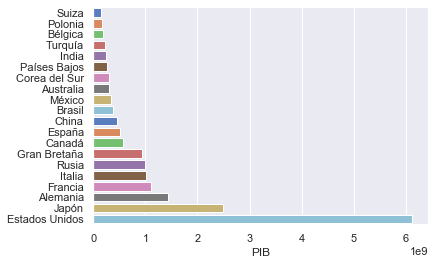

In [58]:
n_largest = pib_ordered_data.tail(20)
sns.set(style = 'darkgrid')
ax = sns.barplot(x = 'pib', y = 'pa_s', orient= 'h', palette='muted', data = n_largest)
ax.set(xlabel='PIB', ylabel='')

El siguiente gráfico de barras muestra los 20 países con el mayor PIB per cápita:

[Text(0, 0.5, ''), Text(0.5, 0, 'PIB per cápita')]

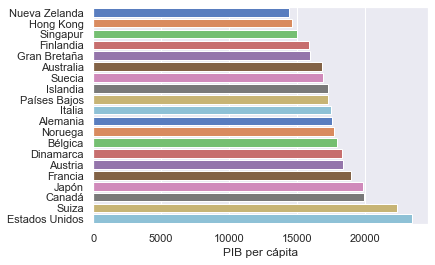

In [59]:
n_largest = pib_cap_ordered_data.tail(20)
sns.set(style = 'darkgrid')
ax = sns.barplot(x = 'pib_cap', y = 'pa_s', orient= 'h', palette='muted', data = n_largest)
ax.set(xlabel='PIB per cápita', ylabel='')